# Notebook 19 (Mini EDA Project On Titanic Datset)-

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#sum of all missing values in each column.

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
# cleaning dataset-

fill_age=titanic['age'].fillna(titanic['age'].median())
fill_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [47]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck'] = titanic['deck'].fillna('Unknown')
titanic['deck'].value_counts()

deck
Unknown    688
C           59
B           47
D           33
E           32
A           15
F           13
G            4
Name: count, dtype: int64

In [52]:
#filling NaN in 'embark_town' with Unknown-

titanic['embark_town']=titanic['embark_town'].fillna(titanic['embark_town'].mode())

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [53]:
#counts the embark town - 
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

# Summarize of passengers with graphs-

In [ ]:
# Survival distribution-

In [64]:
# total no. of survived passengers-

print(titanic['survived'].sum())


342


In [23]:
#survival by gender-

titanic.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

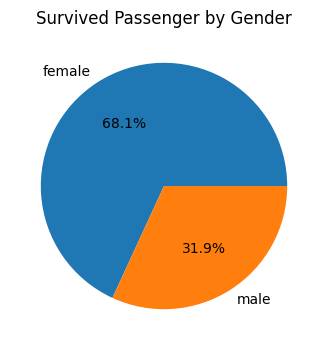

In [34]:
# Creating a Pie Chart-
plt.figure(figsize=(6,4))
plt.pie(survived_gender.values,labels=survived_gender.index,autopct='%1.1f%%')
plt.title('Survived Passenger by Gender')
plt.show()

In [75]:
#finding survived passengers by class-

titanic.groupby('class',observed=False)['survived'].sum()

class
First     136
Second     87
Third     119
Name: survived, dtype: int64

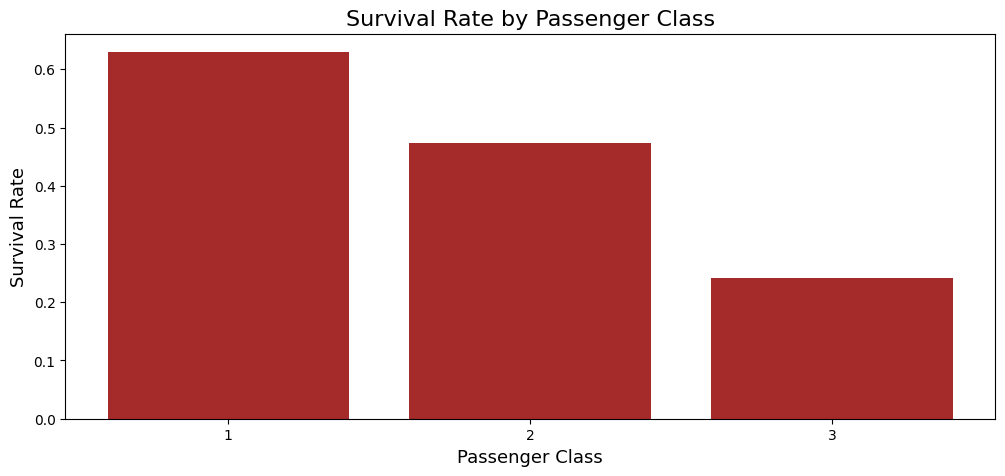

In [50]:
#plotting a bar graph of survived passsengers-

pclass_survival = titanic.groupby('pclass')['survived'].mean()

plt.figure(figsize=(12,5))
plt.bar(pclass_survival.index, pclass_survival.values, color='brown')
plt.xlabel("Passenger Class",fontsize=13)
plt.ylabel("Survival Rate",fontsize=13)
plt.title("Survival Rate by Passenger Class",fontsize=16)
plt.xticks([1, 2, 3])
plt.show()


In [ ]:
#Ag Distribution-

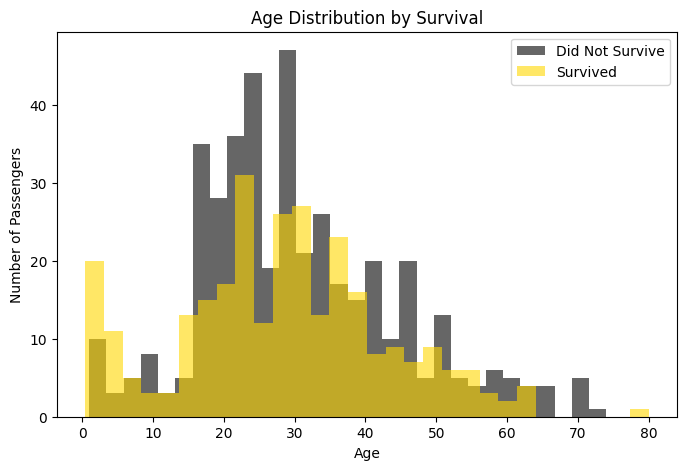

In [46]:
#plotting a histogram of (Age Distribution by Survival)-

plt.figure(figsize=(8,5))
plt.hist(titanic[titanic['survived'] == 0]['age'], bins=30, alpha=0.6, label='Did Not Survive', color='black')
plt.hist(titanic[titanic['survived'] == 1]['age'], bins=30, alpha=0.6, label='Survived', color='gold')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()


In [ ]:
#young passengers (age<30)-

In [87]:
titanic[titanic['age']<30]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,5
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,3
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True,1
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,1
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1


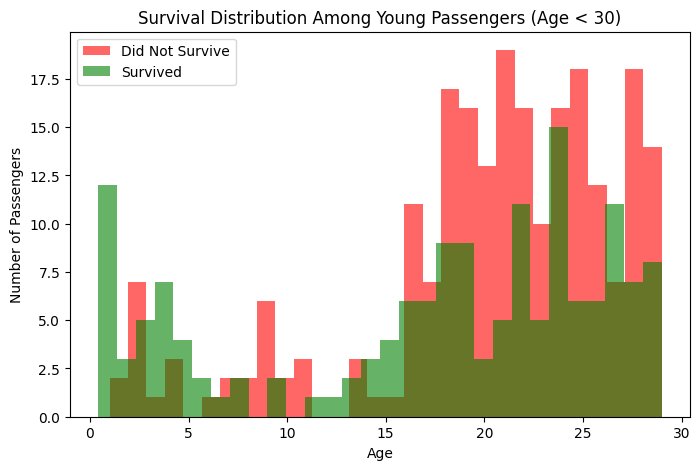

In [44]:
#young passengers survival histogram (age<30)-

young_passengers=titanic[titanic['age']<30]

plt.figure(figsize=(8,5))
plt.hist(young_passengers[young_passengers['survived'] == 0]['age'], bins=30, alpha=0.6, label='Did Not Survive', color='red')
plt.hist(young_passengers[young_passengers['survived'] == 1]['age'], bins=30, alpha=0.6, label='Survived', color='green')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Survival Distribution Among Young Passengers (Age < 30)")
plt.legend()
plt.show()


In [ ]:
# Fare Distribution by Class-

In [89]:
titanic.groupby('pclass')['fare'].sum()

pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: fare, dtype: float64

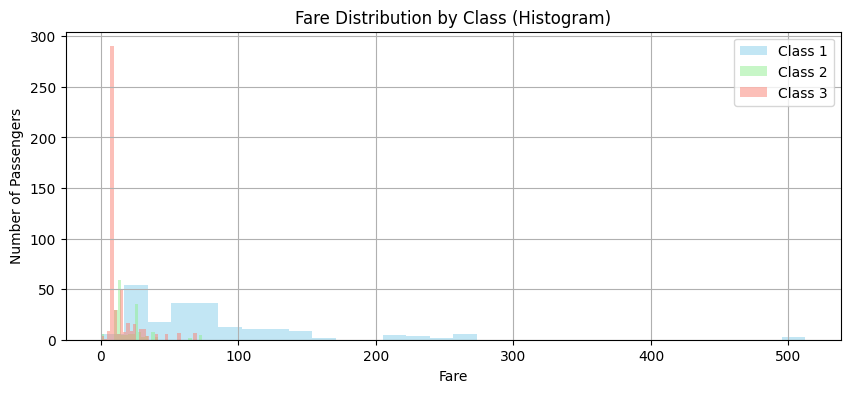

In [90]:
#figure-
plt.figure(figsize=(10,4))

plt.hist(titanic[titanic['pclass'] == 1]['fare'], bins=30, alpha=0.5, label='Class 1', color='skyblue')  #class1
plt.hist(titanic[titanic['pclass'] == 2]['fare'], bins=30, alpha=0.5, label='Class 2', color='lightgreen')  #class2
plt.hist(titanic[titanic['pclass'] == 3]['fare'], bins=30, alpha=0.5, label='Class 3', color='salmon')  #class3

plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Fare Distribution by Class (Histogram)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Family size Survival feature-

In [84]:
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1
family_survival = titanic.groupby('FamilySize')['survived'].mean()  #average of survived family by size.

Family Size vs Survival Rate:

 FamilySize  survived
          1  0.303538
          2  0.552795
          3  0.578431
          4  0.724138
          5  0.200000
          6  0.136364
          7  0.333333
          8  0.000000
         11  0.000000


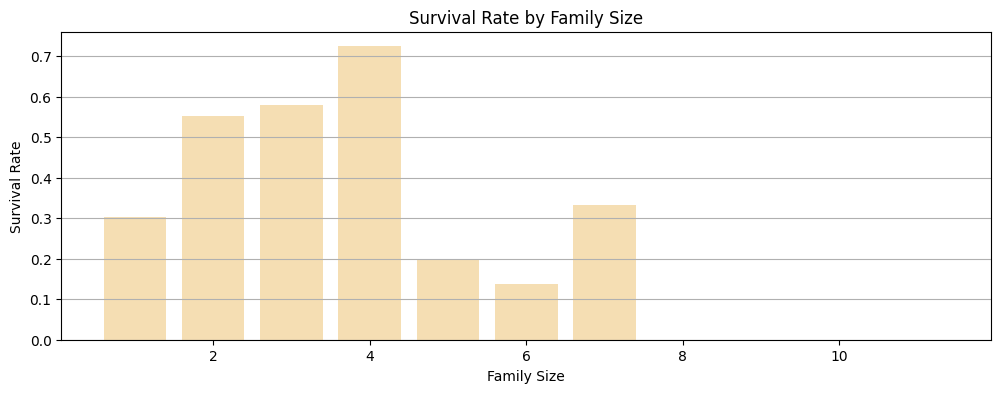

In [91]:
# Family size Survival feature-

#create a family column -
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1
family_survival = titanic.groupby('FamilySize')['survived'].mean()  #average of survived family by size.

plt.figure(figsize=(12,4))  #figure
plt.bar(family_survival.index, family_survival.values, color='wheat')
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.grid(axis='y')
plt.show()
